In [25]:
%pip install librosa
%pip install python_speech_features 

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [26]:
import librosa
import numpy as np
import matplotlib.pyplot as plt
from python_speech_features import mfcc, logfbank

In [27]:
def plot_signals(signals): 
    fig, axes = plt.subplots(nrows=2, ncols=5, sharex=False, sharey=True, figsize=(20, 5))
    fig.suptitle('Time Series', size=16)
    i = 0
    for x in range(2):
        for y in range(3):
            axes[x,y].set_title(list(signals.keys())[i])
            axes[x,y].plot(list(signals.values())[i])
            axes[x,y].get_xaxis().set_visible(False)
            axes[x,y].get_yaxis().set_visible(False)
            i+=1

def plot_fft(fft): 
    fig, axes = plt.subplots(nrows=2, ncols=5, sharex=False, sharey=True, figsize=(20, 5))
    fig.suptitle('Fourier Transform', size=16)
    i = 0
    for x in range(2):
        for y in range(3):
            data = list(fft.values())[i]
            Y, freq = data[0], data[1]
            axes[x,y].set_title(list(fft.keys())[i])
            axes[x,y].plot(freq, Y)
            axes[x,y].get_xaxis().set_visible(False)
            axes[x,y].get_yaxis().set_visible(False)
            i+=1

def plot_fbank(fbank):
    fig, axes = plt.subplots(nrows=2, ncols=5, sharex=False, sharey=True, figsize=(20, 5))
    fig.suptitle('Filter Bank Coefficients', size=16)
    i = 0
    for x in range(2):
        for y in range(3):
            axes[x,y].set_title(list(fbank.keys())[i])
            axes[x,y].imshow(list(fbank.values())[i], cmap='hot', interpolation='nearest')
            axes[x,y].get_xaxis().set_visible(False)
            axes[x,y].get_yaxis().set_visible(False)
            i+=1

In [28]:
def calc_fft(y, rate):
    n = len(y)
    freq = np.fft.rfftfreq(n, d=1/rate)
    Y = abs(np.fft.rfft(y)/n)

    return (Y, freq)

In [29]:
signal1, rate1 = librosa.load('./data/whistle1.wav', sr=44100)
fft_input1 = calc_fft(signal1, rate1)
fbank1 = logfbank(signal1[:rate1], rate1, nfilt=26, nfft=1103).T 

signal2, rate2 = librosa.load('./data/whistle2.wav', sr=44100)
fft_input2 = calc_fft(signal2, rate2)
fbank2 = logfbank(signal2[:rate2], rate2, nfilt=26, nfft=1103).T 


signal3, rate3 = librosa.load('./data/whistle3.wav', sr=44100)
fft_input3 = calc_fft(signal3, rate3)
fbank3 = logfbank(signal3[:rate3], rate3, nfilt=26, nfft=1103).T 

signal_hum1, rate_hum1 = librosa.load('./data/hum1.wav', sr=44100)
fft_input_hum1 = calc_fft(signal_hum1, rate_hum1)
fbank_hum1 = logfbank(signal_hum1[:rate_hum1], rate_hum1, nfilt=26, nfft=1103).T 

signal_hum2, rate_hum2 = librosa.load('./data/hum2.wav', sr=44100)
fft_input_hum2 = calc_fft(signal_hum2, rate_hum2)
fbank_hum2 = logfbank(signal_hum2[:rate_hum2], rate_hum2, nfilt=26, nfft=1103).T 

signal_hum3, rate_hum3 = librosa.load('./data/hum3.wav', sr=44100)
fft_input_hum3 = calc_fft(signal_hum3, rate_hum3)
fbank_hum3 = logfbank(signal_hum3[:rate_hum3], rate_hum3, nfilt=26, nfft=1103).T 


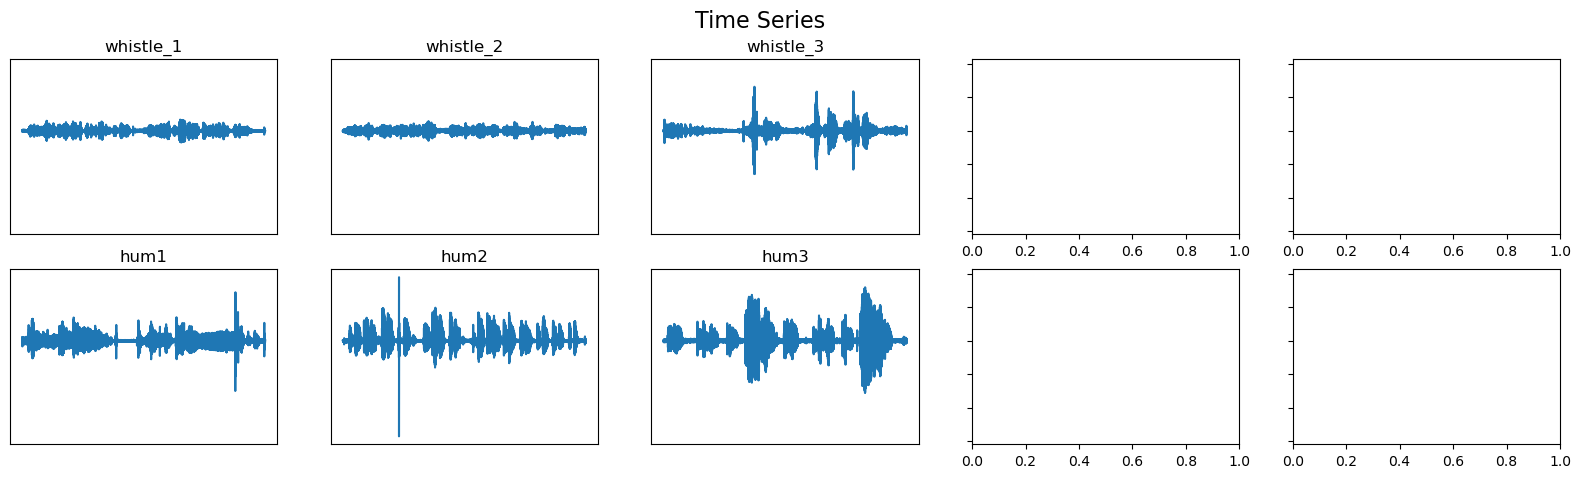

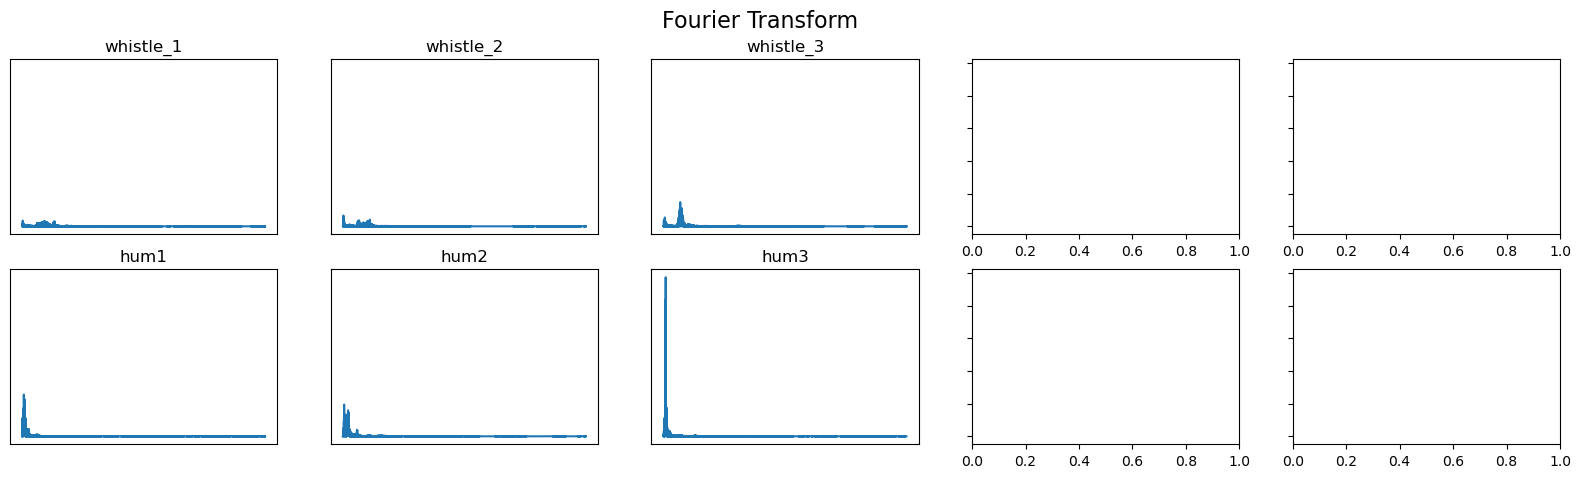

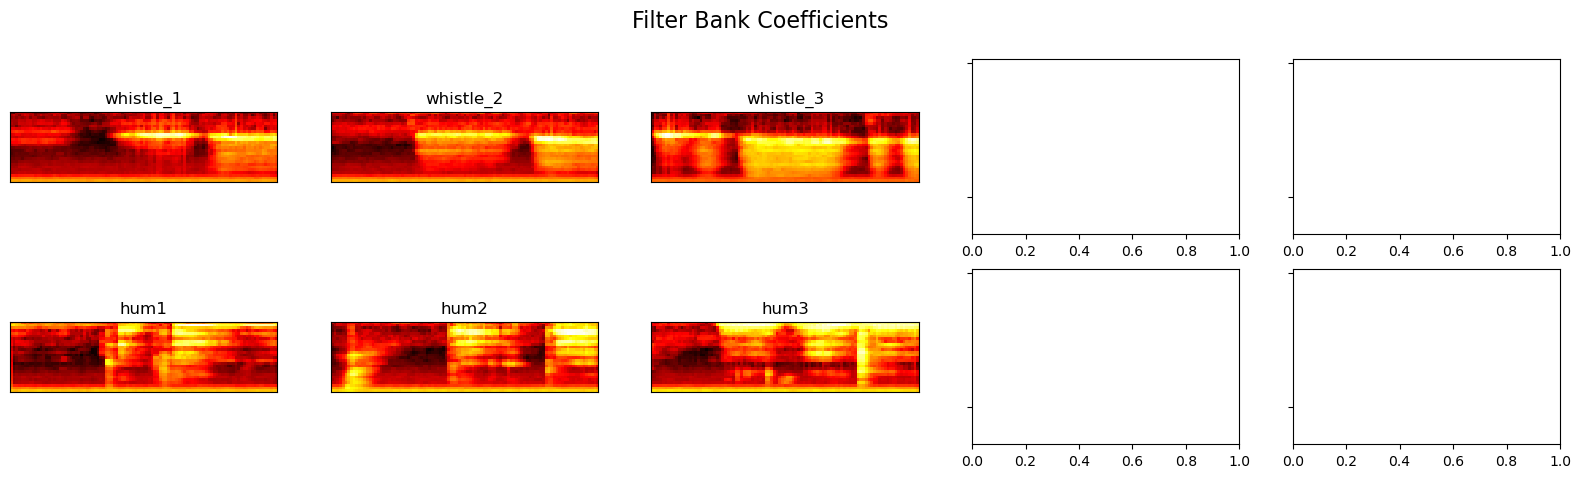

In [30]:
plot_signals({'whistle_1': signal1, 'whistle_2': signal2, 'whistle_3': signal3, 'hum1': signal_hum1, 'hum2': signal_hum2, 'hum3': signal_hum3})
plt.show()

plot_fft({'whistle_1': fft_input1, 'whistle_2': fft_input2, 'whistle_3': fft_input3, 'hum1': fft_input_hum1, 'hum2': fft_input_hum2, 'hum3': fft_input_hum3})
plt.show()

plot_fbank({'whistle_1': fbank1, 'whistle_2': fbank2, 'whistle_3': fbank3, 'hum1': fbank_hum1, 'hum2': fbank_hum2, 'hum3': fbank_hum3})